# S&P 500 Analysis

## Data collection

In [2]:
#yfinance will be used to get the historical data
import yfinance as yf

In [5]:
#Getting S&P 500 historic data
index = yf.Ticker("^GSPC")
data = index.history(start="2000-01-01", end="2024-10-04")
data.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0


## Data cleaning and wrangling

In [6]:
#Giving number index to the dataframe and droping unnecessary columns
df = data.reset_index()
df.drop(columns=['Dividends','Stock Splits'], inplace=True)
df.head(2)

,Date,Open,High,Low,Close,Volume
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000


In [14]:
#Gathering day of the week with datetime and adding it to a list
import datetime

day = []

for i in df['Date']:
    i = str(i)
    processed = i.replace(" ", "-")
    date = processed.split("-")
    instance = datetime.datetime(int(date[0]), int(date[1]), int(date[2]), 00,00,00)
    dayw = instance.weekday()
    day.append(dayw)
    
print(day[0:10])

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [15]:
#Turning number results into weekday name
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Day = []

for i in day:
    dayw = days[i]
    Day.append(dayw)

print(Day[0:10])

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


In [16]:
#Adding the days to the dataframe
df['Day'] = Day
df.head(2)

,Date,Open,High,Low,Close,Volume,Day
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,Monday
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,Tuesday


In [34]:
#Adding months
Month = []

for i in df['Date']:
    i = str(i)
    month = i.split("-")[1]
    Month.append(month)
    
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

Months = []

for i in Month:
    i = int(i)
    month = months[i-1]
    Months.append(month)

df['Month'] = Months
df.head(2)


,Date,Open,High,Low,Close,Volume,Day,Return,Class,Month
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,Monday,-0.95,Negative,January
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,Tuesday,-3.83,Negative,January


In [21]:
#Adding return column
df['Return'] = round(((df['Close'] - df['Open'])/df['Open'])*100,2)
df.head(2)

,Date,Open,High,Low,Close,Volume,Day,Return
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,Monday,-0.95
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,Tuesday,-3.83


In [22]:
#Adding class column
classes = []

for result in df['Return']:
    if result < 0:
        classes.append("Negative")
    elif result > 0:
        classes.append("Positive")
    else:
        classes.append("Neutral")

df['Class'] = classes
df.head(2)

,Date,Open,High,Low,Close,Volume,Day,Return,Class
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,Monday,-0.95,Negative
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,Tuesday,-3.83,Negative


## Exploratory data analysis (EDA) with SQL

In [23]:
import sqlite3

In [35]:
#Creating connection to a database
connection = sqlite3.connect('S&P_500.db')

In [37]:
#Creating a table in the database using the dataframe
sql_df = df.to_sql('STOCK500', connection)

In [38]:
#Now load the sql module to ipython
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [39]:
#Point to the database we're using
%sql sqlite:///S&P_500.db

In [41]:
#SQL should now be working on the notebook
%sql SELECT * FROM STOCK500 LIMIT 5;

 * sqlite:///S&P_500.db
Done.


index,Date,Open,High,Low,Close,Volume,Day,Return,Class,Month
0,2000-01-03 00:00:00-05:00,1469.25,1478.0,1438.3599853515625,1455.219970703125,931800000,Monday,-0.95,Negative,January
1,2000-01-04 00:00:00-05:00,1455.219970703125,1455.219970703125,1397.4300537109375,1399.4200439453125,1009000000,Tuesday,-3.83,Negative,January
2,2000-01-05 00:00:00-05:00,1399.4200439453125,1413.27001953125,1377.6800537109375,1402.1099853515625,1085500000,Wednesday,0.19,Positive,January
3,2000-01-06 00:00:00-05:00,1402.1099853515625,1411.9000244140625,1392.0999755859375,1403.449951171875,1092300000,Thursday,0.1,Positive,January
4,2000-01-07 00:00:00-05:00,1403.449951171875,1441.469970703125,1400.72998046875,1441.469970703125,1225200000,Friday,2.71,Positive,January


In [42]:
#Lets see how many positive, negative and neutral days there were in the observed period
%sql SELECT Class, COUNT(*) AS OUTCOME_COUNT FROM STOCK500 GROUP BY Class;

 * sqlite:///S&P_500.db
Done.


Class,OUTCOME_COUNT
Negative,2882
Neutral,45
Positive,3301


In [68]:
#Count of positive days for each day of the week
%sql SELECT Day, \
              COUNT(CASE WHEN Class = 'Positive' THEN 1 END) AS positive_count \
              FROM STOCK500 \
              GROUP BY Day ORDER BY positive_count DESC;

 * sqlite:///S&P_500.db
Done.


Day,positive_count
Thursday,689
Wednesday,685
Friday,665
Tuesday,651
Monday,611


In [69]:
%sql SELECT Day, \
COUNT(CASE WHEN Class = 'Negative' THEN 1 END) AS negative_count \
      FROM STOCK500 \
      GROUP BY Day ORDER BY negative_count DESC;

 * sqlite:///S&P_500.db
Done.


Day,negative_count
Tuesday,617
Wednesday,588
Friday,574
Thursday,559
Monday,544


In [70]:
#sql Months that contained most negative days
%sql SELECT Month, \
              COUNT(CASE WHEN Class = 'Positive' THEN 1 END) AS positive_count \
              FROM STOCK500 \
              GROUP BY Month ORDER BY positive_count DESC;

 * sqlite:///S&P_500.db
Done.


Month,positive_count
August,305
July,291
March,286
October,283
June,278
November,273
April,271
May,269
December,268
January,267


In [71]:
%sql SELECT Month, \
COUNT(CASE WHEN Class = 'Negative' THEN 1 END) AS negative_count \
      FROM STOCK500 \
      GROUP BY Month ORDER BY negative_count DESC;

 * sqlite:///S&P_500.db
Done.


Month,negative_count
May,260
September,256
March,256
June,250
August,249
October,244
April,241
January,235
December,235
July,229


## Exploratory data analysis (EDA) with Pandas

In [88]:
#Lets see how many positive, negative and neutral days there were in the observed period
count_of_results = df['Class'].value_counts().to_frame()
count_of_results

,count
Class,
Positive,3301
Negative,2882
Neutral,45


In [90]:
#Now lets get the results for weekday
results_week = df.groupby(['Day','Class']).size().unstack(fill_value=0)
results_week

Class,Negative,Neutral,Positive
Day,,,
Friday,574,10,665
Monday,544,11,611
Thursday,559,9,689
Tuesday,617,9,651
Wednesday,588,6,685


In [95]:
#Positive results per week day
positives_week = results_week['Positive'].to_frame().sort_values(by='Positive', ascending=False)
positives_week

,Positive
Day,
Thursday,689
Wednesday,685
Friday,665
Tuesday,651
Monday,611


In [97]:
#Negative results per week day
negatives_week = results_week['Negative'].to_frame().sort_values(by='Negative', ascending=False)
negatives_week

,Negative
Day,
Tuesday,617
Wednesday,588
Friday,574
Thursday,559
Monday,544


In [99]:
#All results by month
results_month = df.groupby(['Month','Class']).size().unstack(fill_value=0)
results_month

Class,Negative,Neutral,Positive
Month,,,
April,241,4,271
August,249,2,305
December,235,1,268
February,214,4,262
January,235,5,267
July,229,7,291
June,250,3,278
March,256,5,286
May,260,2,269


In [100]:
#Positive results by month
positives_months = results_month['Positive'].to_frame().sort_values(by='Positive', ascending=False)
positives_months

,Positive
Month,
August,305
July,291
March,286
October,283
June,278
November,273
April,271
May,269
December,268


In [101]:
negatives_month = results_month['Negative'].to_frame().sort_values(by='Negative', ascending=False)
negatives_month

,Negative
Month,
May,260
March,256
September,256
June,250
August,249
October,244
April,241
December,235
January,235


## Data visualization

In [103]:
import matplotlib.pyplot as plt

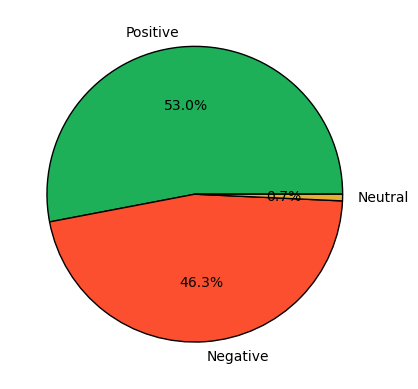

In [146]:
#Pie chart to compare positive, negative and neutral days
colors = ['#1eb058','#fc4f30','#e5ae37']
plt.pie(x=count_of_results['count'], labels=count_of_results.index, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.1f%%')
plt.show()

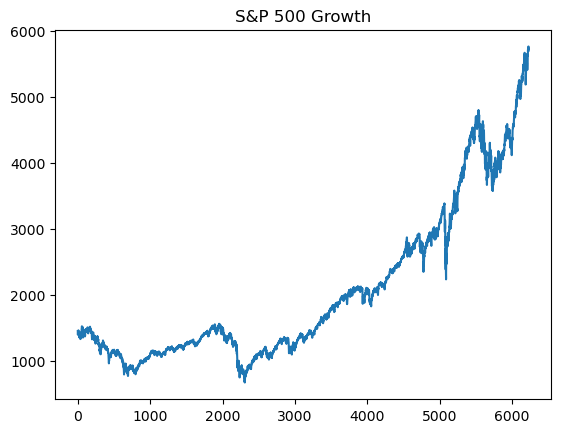

In [120]:
#Line plot to show the S&P 500 index grew over time
plt.plot(df['Close'])
plt.title('S&P 500 Growth')
plt.show()

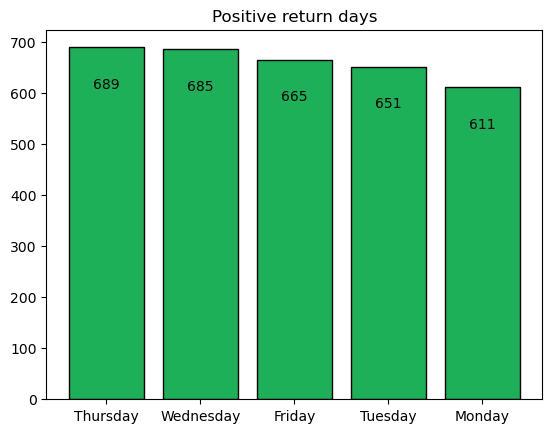

In [145]:
#Bar charts to compare week days with most positive days
plt.bar(positives_week.index, positives_week['Positive'], edgecolor='black', color='#1eb058')
plt.title("Positive return days")

for i, g in enumerate(positives_week['Positive']):
    plt.text(i, g-80, f"{g}", ha='center')
    
plt.show()

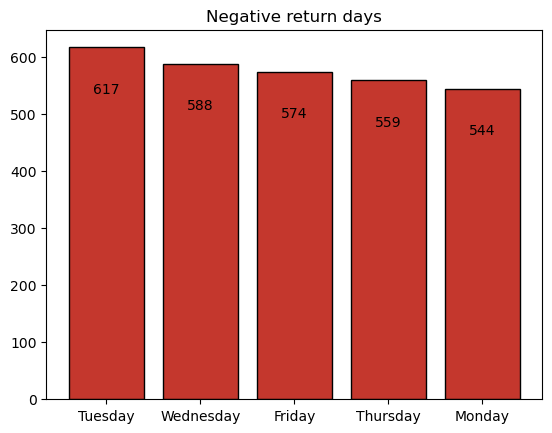

In [148]:
#Bar charts to compare week days with most negative days
plt.bar(negatives_week.index, negatives_week['Negative'], edgecolor='black', color='#c4372d')
plt.title("Negative return days")

for i, g in enumerate(negatives_week['Negative']):
    plt.text(i, g-80, f"{g}", ha='center')
    
plt.show()

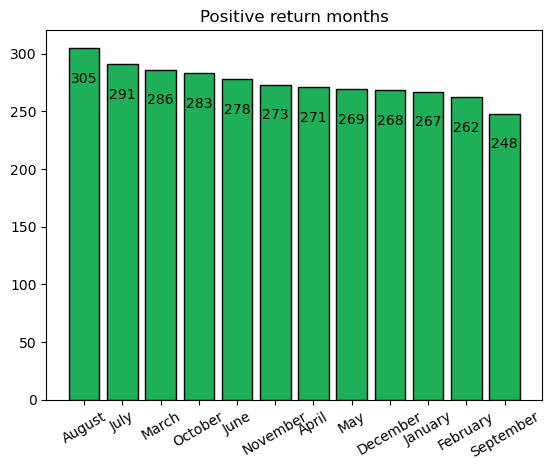

In [172]:
#Bar charts to compare months with most positive days
plt.bar(positives_months.index, positives_months['Positive'], edgecolor='black', color='#1eb058')
plt.title("Positive return months")

labels = []

for i, g in enumerate(positives_months['Positive']):
    plt.text(i, g-30, f"{g}", ha='center')
plt.xticks(rotation=30)
    
plt.show()

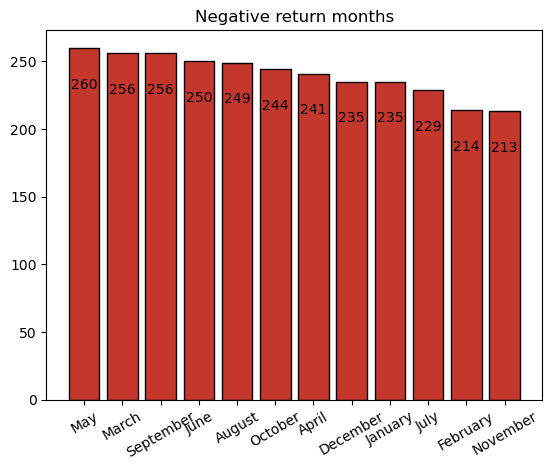

In [176]:
#Bar charts to compare months with most negative days
plt.bar(negatives_month.index, negatives_month['Negative'], edgecolor='black', color='#c4372d')
plt.title("Negative return months")

for i, g in enumerate(negatives_month['Negative']):
    plt.text(i, g-30, f"{g}", ha='center')
    
plt.xticks(rotation=30)

plt.show()

## Wrapping up

In [185]:
#top 20 days with greatest percentual losses
worst = df.sort_values(by='Return')
worst = worst[['Date', 'Return', 'Day', 'Month']].head(20)
worst

,Date,Return,Day,Month
2209,2008-10-15 00:00:00-04:00,-8.72,Wednesday,October
2197,2008-09-29 00:00:00-04:00,-8.49,Monday,September
2241,2008-12-01 00:00:00-05:00,-8.15,Monday,December
2205,2008-10-09 00:00:00-04:00,-7.94,Thursday,October
2235,2008-11-20 00:00:00-05:00,-6.63,Thursday,November
2917,2011-08-08 00:00:00-04:00,-6.59,Monday,August
2234,2008-11-19 00:00:00-05:00,-6.11,Wednesday,November
72,2000-04-14 00:00:00-04:00,-5.83,Friday,April
2203,2008-10-07 00:00:00-04:00,-5.80,Tuesday,October
2214,2008-10-22 00:00:00-04:00,-5.77,Wednesday,October


In [190]:
#worst percentual losses days in the top 20
result = worst.groupby('Day')['Return'].sum()
result.to_frame().sort_values(by='Return')

,Return
Day,
Monday,-37.68
Wednesday,-30.10
Thursday,-30.04
Friday,-11.05
Tuesday,-11.03


In [191]:
#Total return for each day
total = df.groupby('Day')['Return'].sum()
total.to_frame().sort_values(by='Return')

,Return
Day,
Friday,-4.21
Monday,5.07
Wednesday,15.24
Tuesday,42.26
Thursday,54.89
